In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
from plotly.offline import iplot
import plotly.express as px 
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [3]:
df=pd.read_csv('FinalDF.csv')
df.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,9.041922,3,7,5,2003,2003,4,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9.169518,3,6,8,1976,1976,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,9.328123,2,7,5,2001,2002,4,2,4,...,0,0,0,0,1,0,0,0,1,0
3,60,9.565214,2,8,5,2000,2000,4,2,4,...,0,0,0,0,1,0,0,0,1,0
4,50,9.554993,2,5,5,1993,1995,2,2,4,...,0,0,0,0,1,0,0,0,1,0


In [4]:
X=df.drop('SalePrice',axis=1)
y=df[['SalePrice']]

In [5]:
X.shape

(1169, 174)

In [6]:
y

,SalePrice
0,208500
1,181500
2,223500
3,250000
4,143000
...,...
1164,84500
1165,185000
1166,175000
1167,210000


## Feature Importence & Selection

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [8]:
model.feature_importances_

array([2.27169752e-03, 3.51171883e-03, 1.97725962e-03, 1.66938983e-01,
       4.10690878e-03, 1.68599921e-02, 6.76797093e-03, 1.81600545e-01,
       1.26683216e-03, 2.25136685e-02, 9.23311002e-04, 2.48669812e-03,
       4.39287850e-03, 1.56335166e-02, 2.46758331e-04, 2.57690748e-04,
       4.03704447e-03, 1.00499677e-03, 1.20442922e-02, 2.12267197e-04,
       4.29783880e-02, 1.01002140e-03, 4.38707917e-03, 1.57431473e-03,
       8.26858895e-02, 3.15253599e-03, 9.71599232e-03, 1.02648120e-03,
       3.63482038e-02, 9.84010224e-03, 3.09579843e-04, 1.46791775e-04,
       2.13075004e-03, 2.78418895e-03, 1.66227114e-03, 1.55875005e-03,
       7.18107746e-04, 4.64006742e-05, 1.12466789e-04, 2.51930292e-03,
       2.14352881e-03, 2.36364488e-03, 4.92271275e-03, 3.18649206e-03,
       1.39158439e-02, 2.92373635e-02, 1.93771702e-01, 4.70373934e-04,
       6.50336069e-05, 1.67401821e-03, 1.97506427e-03, 2.52516929e-03,
       2.73373576e-04, 1.33474812e-03, 4.18685999e-04, 3.26611470e-04,
      

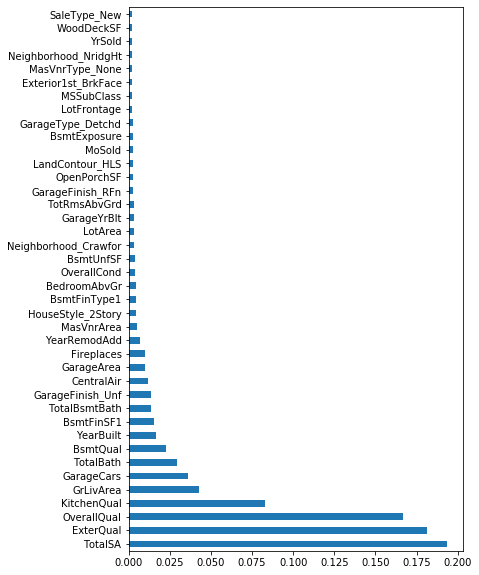

In [9]:
plt.figure(figsize=(6,10))
feature_importance=pd.Series(data=model.feature_importances_,index=X.columns)
feature_importance.nlargest(40).plot(kind='barh')

In [10]:
## use Lasso Regression to select the features 

In [11]:
feature_Sel_model=SelectFromModel(Lasso(alpha=0.05,random_state=20))
feature_Sel_model.fit(X,y)


C:\Users\JESAL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 161862069180.39658, tolerance: 479511060.25518304



SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=20,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [12]:
feature_Sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
selected_feature=X.columns[(feature_Sel_model.get_support())]
print('total features:{}'.format((X.shape[1])))
print('selected feature:{} '.format(len(selected_feature)))
print('feature with coeeficient sharnk to zero:{}'.format(np.sum(feature_Sel_model.estimator_.coef_==0))) #skipped features

total features:174
selected feature:173 
feature with coeeficient sharnk to zero:1


In [14]:
#Split data into train and test set

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Modelling
- LinearRegression
- xgbboostRegressor

##  Linear Regression

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [17]:
y_pred

array([[150111.80844635],
       [263573.98569127],
       [187633.51830334],
       [173680.8462803 ],
       [171244.40102515],
       [150446.32896697],
       [163452.24752227],
       [175672.46875834],
       [148440.68730685],
       [150183.56468541],
       [185327.7607771 ],
       [116441.17524578],
       [ 47378.00820161],
       [203266.561896  ],
       [282321.79550888],
       [220668.72156603],
       [118596.76970142],
       [106958.89059077],
       [ 75356.73786522],
       [158357.77190061],
       [112927.81988375],
       [138098.06722594],
       [278008.96070444],
       [167237.64929546],
       [140101.88750647],
       [308195.35540126],
       [105057.21488633],
       [112274.361208  ],
       [114461.02846341],
       [191231.76762202],
       [135969.15858706],
       [154134.40542747],
       [159592.93282744],
       [164167.7228416 ],
       [113410.21140392],
       [128612.47911494],
       [ 92133.96281784],
       [252945.45075689],
       [2167

In [18]:
y_test

,SalePrice
663,167000
69,260000
43,177000
838,165000
366,175500
...,...
298,125000
195,318000
425,107500
695,116000


In [19]:
#check bais of data
model.score(X_train,y_train)

0.9315996289119574

In [20]:
#check variance of data

In [21]:
model.score(X_test,y_test)

0.9122935703372458

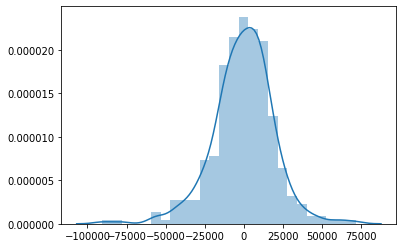

In [22]:
sb.distplot(y_test-y_pred)

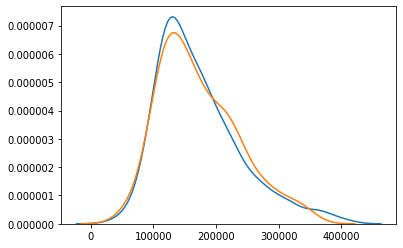

In [23]:
sb.distplot(y_test,kde=True,hist=False)
sb.distplot(y_pred,kde=True,hist=False)

In [24]:
from sklearn import metrics

In [25]:
print('MSE:',metrics.mean_squared_error(y_test,y_pred))

MSE: 387318243.71075535


In [26]:
#accuracy of model : 91.4%
metrics.r2_score(y_test,y_pred)

0.9122935703372458

## xgboost regression 

In [27]:
from xgboost import XGBRegressor

In [28]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


In [29]:
xgb.fit(X_train,y_train)

[16:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=2400, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.6,
             reg_lambda=0.6, scale_pos_weight=1, silent=None, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=1)

In [30]:
y_pred1=xgb.predict(X_test)

In [31]:
r2_score(y_test,y_pred1) # accuracy of model : 92%

0.9208211165332922

In [32]:
print('MSE:',metrics.mean_squared_error(y_test,y_pred1))

MSE: 349659953.10976833


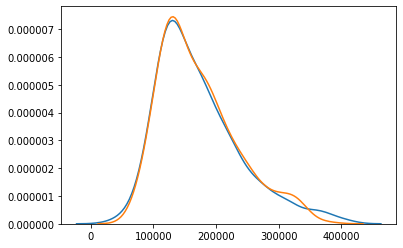

In [33]:
sb.distplot(y_test,kde=True,hist=False)
sb.distplot(y_pred1,kde=True,hist=False)